In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [3]:
stud_math = pd.read_csv('stud_math.csv')

In [6]:
# переименовываем колонку
stud_math = stud_math.rename(columns={'studytime, granular': 'studytime_granular'})

In [125]:
# функция получения информации о колонке
def col_info(col):
    print(col.unique())
    display(pd.DataFrame(col.value_counts()))

In [126]:
def interquartile_info(col):
    IQR = col.quantile(0.75) - col.quantile(0.25)
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), 
          '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), 
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [10]:
def quantile_25(col):
    perc25 = col.quantile(0.25)
    return perc25

def quantile_75(col):
    perc75 = col.quantile(0.75)
    return perc75

def interquartile_range(col):
    IQR = col.quantile(0.75) - col.quantile(0.25)
    return IQR

# Анализ данных

Случайная выборка из набора

In [11]:
stud_math.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
154,GP,F,17,U,GT3,T,4.0,4.0,other,teacher,course,mother,1.0,1.0,0.0,yes,yes,no,no,yes,-3.0,yes,no,yes,4.0,2.0,1.0,4.0,0.0,60.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
218,GP,F,17,U,GT3,T,2.0,3.0,at_home,other,home,father,2.0,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,no,no,3.0,3.0,3.0,3.0,3.0,40.0
279,GP,M,18,U,LE3,T,4.0,3.0,teacher,services,course,NaN,2.0,1.0,0.0,no,NaN,NaN,yes,yes,-3.0,yes,yes,no,4.0,2.0,3.0,1.0,8.0,50.0
318,GP,F,17,R,GT3,T,3.0,4.0,at_home,services,course,NaN,1.0,3.0,0.0,no,yes,NaN,yes,no,-9.0,yes,yes,no,4.0,3.0,4.0,5.0,0.0,50.0
310,GP,F,19,U,LE3,T,1.0,NaN,services,services,home,other,NaN,2.0,1.0,no,no,no,yes,no,-6.0,yes,no,yes,4.0,2.0,4.0,3.0,0.0,0.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,-3.0,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
250,GP,M,18,U,GT3,T,3.0,2.0,services,NaN,course,mother,2.0,1.0,1.0,no,no,no,no,yes,-3.0,NaN,yes,no,4.0,4.0,5.0,5.0,0.0,40.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0


Все колонки набора

In [12]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Проверка на пустые значения

In [123]:
def missing_values_table(df):
        # сумма отсутствующих данных
        mis_val = df.isnull().sum()
        
        # процент отсутствующих данных
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # таблица с результатом
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # проименуем колонки
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Отсутствующих данных', 1 : '% от всех данных'})
        
        # сортировка таблицы
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от всех данных', ascending=False).round(1)
        
        # дополнительная информация
        print ("Было выбрано " + str(df.shape[1]) + " колонок.\n"      
            "Среди их " + str(mis_val_table_ren_columns.shape[0]) +
              " с отсутствующими данными.")
        
        return mis_val_table_ren_columns

In [124]:
missing_values_table(stud_math)

Было выбрано 30 колонок.
Среди их 22 с отсутствующими данными.


,Отсутствующих данных,% от всех данных
paid,25,9.9
Pstatus,24,9.5
guardian,24,9.5
famsup,22,8.7
internet,22,8.7
romantic,19,7.5
Fjob,19,7.5
famsize,14,5.6
nursery,12,4.8
reason,12,4.8


Подробная информация о колонках набора

In [13]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

## Анализ колонок

### float64

Набор содержит 12 колонок с типом float64.

#### Medu

образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [14]:
stud_math.Medu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

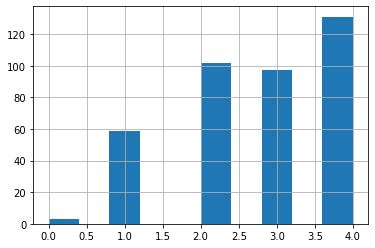

In [15]:
stud_math.Medu.hist()
stud_math.Medu.describe()

In [16]:
interquartile_info(stud_math.Medu)

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


<AxesSubplot:>

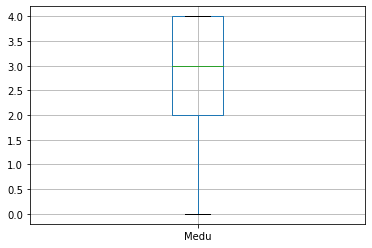

In [17]:
stud_math.boxplot(column=['Medu'])

#### Fedu

образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [18]:
stud_math.Fedu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

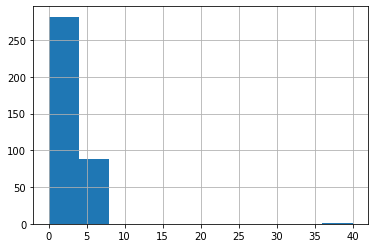

In [19]:
stud_math.Fedu.hist()
stud_math.Fedu.describe()

<AxesSubplot:>

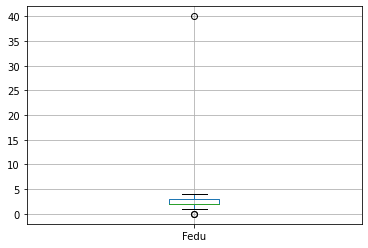

In [20]:
stud_math.boxplot(column=['Fedu'])

In [21]:
interquartile_info(stud_math.Fedu)

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


In [22]:
perc25 = quantile_25(stud_math.Fedu)
perc75 = quantile_75(stud_math.Fedu)
IQR = interquartile_range(stud_math.Fedu)
stud_math = stud_math.loc[stud_math.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    368.000000
mean       2.527174
std        1.074511
min        1.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

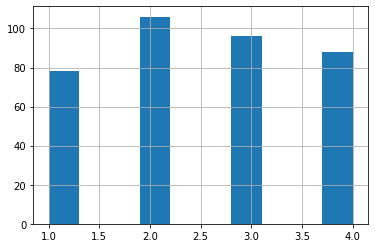

In [23]:
stud_math.Fedu.hist()
stud_math.Fedu.describe()

<AxesSubplot:>

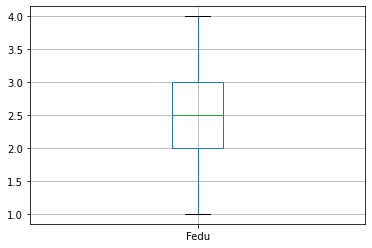

In [24]:
stud_math.boxplot(column=['Fedu'])

#### traveltime

время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [25]:
stud_math.traveltime.unique()

array([ 2.,  1.,  3., nan,  4.])

count    343.000000
mean       1.446064
std        0.702444
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

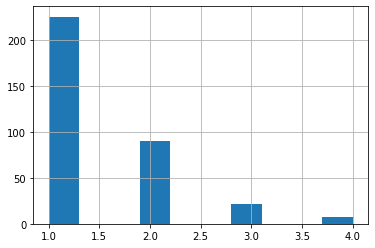

In [26]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

In [27]:
interquartile_info(stud_math.traveltime)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


<AxesSubplot:>

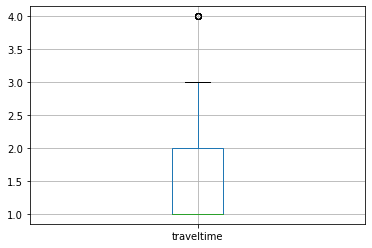

In [28]:
stud_math.boxplot(column=['traveltime'])

In [29]:
perc25 = quantile_25(stud_math.traveltime)
perc75 = quantile_75(stud_math.traveltime)
IQR = interquartile_range(stud_math.traveltime)
stud_math = stud_math.loc[stud_math.traveltime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    336.000000
mean       1.392857
std        0.603826
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: traveltime, dtype: float64

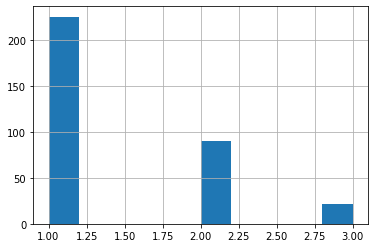

In [30]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

<AxesSubplot:>

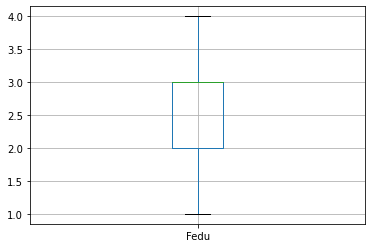

In [31]:
stud_math.boxplot(column=['Fedu'])

#### studytime

время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [32]:
stud_math.studytime.unique()

array([ 2.,  3.,  1., nan,  4.])

count    330.000000
mean       2.024242
std        0.835762
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

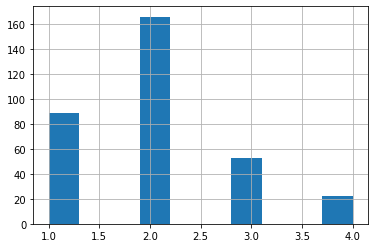

In [33]:
stud_math.studytime.hist()
stud_math.studytime.describe()

#### failures

количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [34]:
stud_math.failures.unique()

array([ 0.,  3.,  2.,  1., nan])

count    321.000000
mean       0.323988
std        0.725227
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

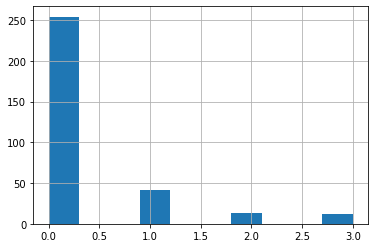

In [35]:
stud_math.failures.hist()
stud_math.failures.describe()

#### studytime_granular

In [36]:
stud_math.studytime_granular.unique()

array([ -6.,  -9.,  -3.,  nan, -12.])

count    330.000000
mean      -6.072727
std        2.507287
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

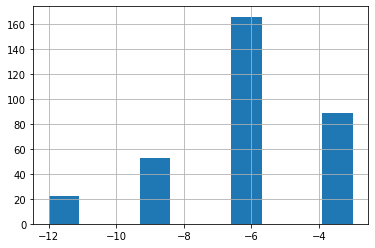

In [37]:
stud_math.studytime_granular.hist()
stud_math.studytime_granular.describe()

<AxesSubplot:>

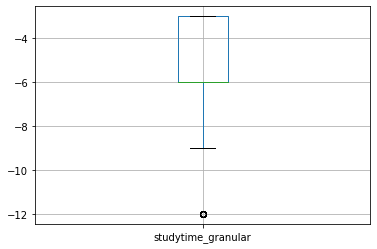

In [38]:
stud_math.boxplot(column=['studytime_granular'])

#### famrel

семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [39]:
stud_math.famrel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

count    314.000000
mean       3.942675
std        0.920078
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

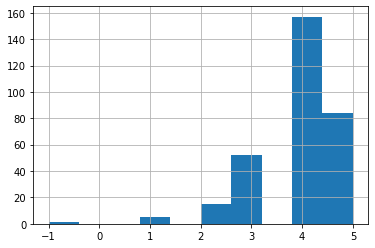

In [40]:
stud_math.famrel.hist()
stud_math.famrel.describe()

In [41]:
interquartile_info(stud_math.famrel)

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


<AxesSubplot:>

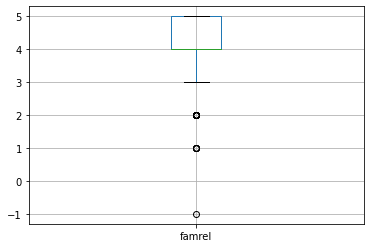

In [42]:
stud_math.boxplot(column=['famrel'])

In [43]:
stud_math = stud_math.loc[stud_math.famrel >= 1]

count    313.000000
mean       3.958466
std        0.877898
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

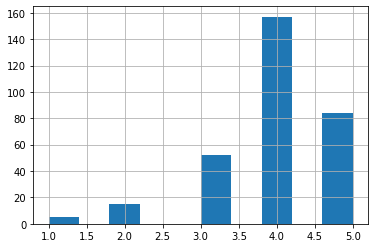

In [44]:
stud_math.famrel.hist()
stud_math.famrel.describe()

#### freetime

свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [45]:
stud_math.freetime.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

count    304.000000
mean       3.226974
std        0.997255
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

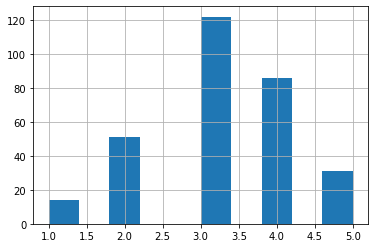

In [46]:
stud_math.freetime.hist()
stud_math.freetime.describe()

#### goout

проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [47]:
stud_math.goout.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

count    306.000000
mean       3.111111
std        1.086764
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

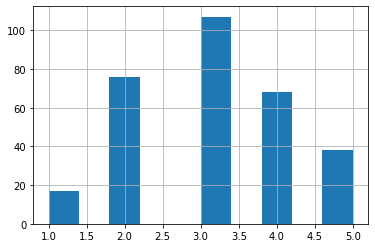

In [48]:
stud_math.goout.hist()
stud_math.goout.describe()

In [49]:
interquartile_info(stud_math.goout)

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


<AxesSubplot:>

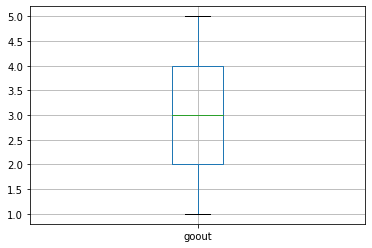

In [50]:
stud_math.boxplot(column=['goout'])

#### health

текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [51]:
stud_math.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

count    302.000000
mean       3.417219
std        1.387450
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

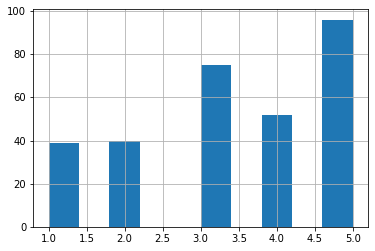

In [52]:
stud_math.health.hist()
stud_math.health.describe()

In [53]:
interquartile_info(stud_math.health)

25-й перцентиль: 2.0, 75-й перцентиль: 5.0, IQR: 3.0,  Границы выбросов: [-2.5, 9.5].


<AxesSubplot:>

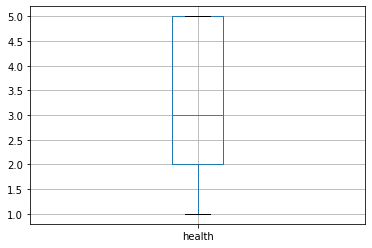

In [54]:
stud_math.boxplot(column=['health'])

#### absences

количество пропущенных занятий

In [55]:
stud_math.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,   8.,  25.,  14.,  12.,
        54.,  18.,  26.,  56.,  24.,  28.,   5.,  13.,  15.,  22.,   3.,
       385.,  20.,  21.,   1.,   9.,  38.,  40.,  23.,   7.,  11.,  17.,
       212.])

count    301.000000
mean       7.591362
std       25.977602
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

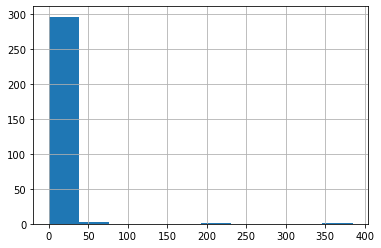

In [56]:
stud_math.absences.hist()
stud_math.absences.describe()

In [57]:
interquartile_info(stud_math.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


<AxesSubplot:>

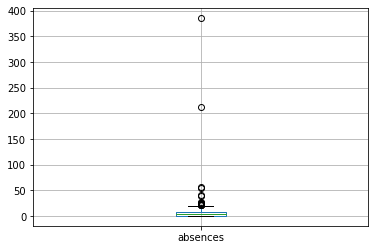

In [58]:
stud_math.boxplot(column=['absences'])

In [59]:
perc25 = quantile_25(stud_math.absences)
perc75 = quantile_75(stud_math.absences)
IQR = interquartile_range(stud_math.absences)
stud_math = stud_math.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    286.000000
mean       4.500000
std        4.833182
min        0.000000
25%        0.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: absences, dtype: float64

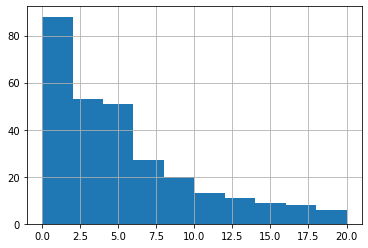

In [60]:
stud_math.absences.hist()
stud_math.absences.describe()

#### score

баллы по госэкзамену по математике

In [61]:
stud_math.score.unique()

array([ 30.,  50.,  75.,  55.,  45.,  80.,  70.,  25.,  60.,  85.,  90.,
        65., 100.,  35.,  40.,  95.,   0.,  nan])

count    281.000000
mean      52.064057
std       22.685965
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

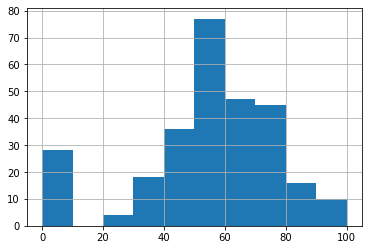

In [62]:
stud_math.score.hist()
stud_math.score.describe()

<AxesSubplot:>

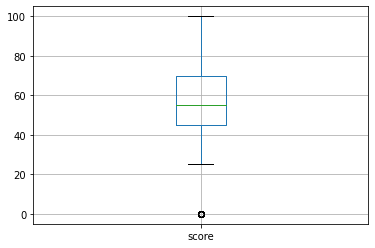

In [63]:
stud_math.boxplot(column=['score'])

In [64]:
interquartile_info(stud_math.score)

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


In [65]:
perc25 = quantile_25(stud_math.score)
perc75 = quantile_75(stud_math.score)
IQR = interquartile_range(stud_math.score)
stud_math = stud_math.loc[stud_math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

<AxesSubplot:>

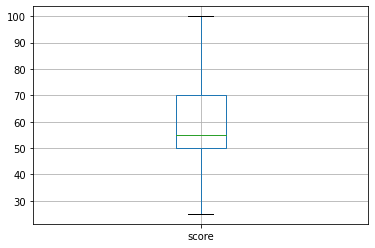

In [66]:
stud_math.boxplot(column=['score'])

count    253.000000
mean      57.826087
std       15.405156
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

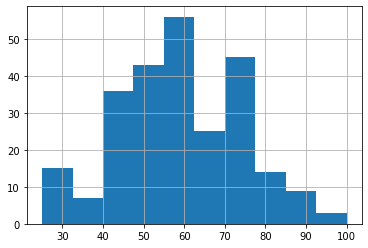

In [67]:
stud_math.score.hist()
stud_math.score.describe()

### int64

Набор содержит 1 колоноку с типом int64.

#### age

возраст ученика (от 15 до 22)

In [68]:
stud_math.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

count    253.000000
mean      16.648221
std        1.256241
min       15.000000
25%       16.000000
50%       16.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

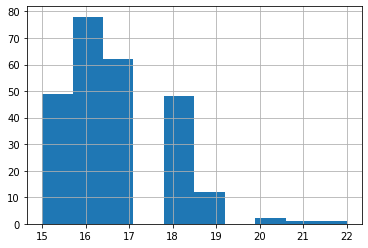

In [69]:
stud_math.age.hist()
stud_math.age.describe()

<AxesSubplot:>

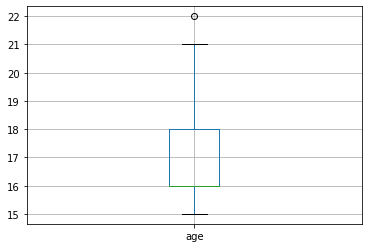

In [70]:
stud_math.boxplot(column=['age'])

In [71]:
interquartile_info(stud_math.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [72]:
perc25 = quantile_25(stud_math.age)
perc75 = quantile_75(stud_math.age)
IQR = interquartile_range(stud_math.age)
stud_math = stud_math.loc[stud_math.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    252.000000
mean      16.626984
std        1.212381
min       15.000000
25%       16.000000
50%       16.000000
75%       17.250000
max       21.000000
Name: age, dtype: float64

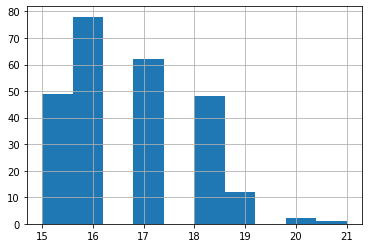

In [73]:
stud_math.age.hist()
stud_math.age.describe()

<AxesSubplot:>

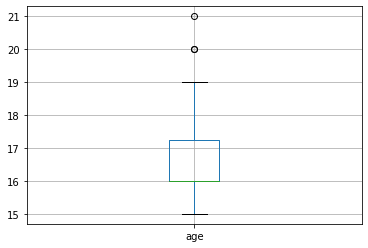

In [74]:
stud_math.boxplot(column=['age'])

### object

Набор содержит 17 колонок с типом object.

#### school

аббревиатура школы, в которой учится ученик

In [75]:
col_info(stud_math.school)

['GP' 'MS']


,school
GP,222
MS,30


#### sex

пол ученика ('F' - женский, 'M' - мужской)

In [76]:
col_info(stud_math.sex)

['F' 'M']


,sex
F,134
M,118


#### address

тип адреса ученика ('U' - городской, 'R' - за городом)

In [77]:
col_info(stud_math.address)

['U' nan 'R']


,address
U,192
R,52


#### famsize

размер семьи('LE3' <= 3, 'GT3' >3)

In [78]:
col_info(stud_math.famsize)

[nan 'GT3' 'LE3']


,famsize
GT3,161
LE3,77


#### Pstatus

статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [79]:
col_info(stud_math.Pstatus)

['A' nan 'T']


,Pstatus
T,206
A,22


#### Mjob

работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [80]:
col_info(stud_math.Mjob)

['at_home' 'health' 'other' 'services' 'teacher' nan]


,Mjob
other,81
services,62
at_home,38
teacher,35
health,25


#### Fjob

работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [81]:
col_info(stud_math.Fjob)

['teacher' 'other' nan 'health' 'services' 'at_home']


,Fjob
other,129
services,65
teacher,18
at_home,11
health,10


#### reason

причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [82]:
col_info(stud_math.reason)

['course' 'other' 'home' 'reputation' nan]


,reason
course,80
reputation,71
home,63
other,26


#### guardian

опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [83]:
col_info(stud_math.guardian)

['mother' 'father' 'other' nan]


,guardian
mother,158
father,54
other,16


#### schoolsup

дополнительная образовательная поддержка (yes или no)

In [84]:
col_info(stud_math.schoolsup)

['yes' 'no' nan]


,schoolsup
no,211
yes,33


#### famsup

семейная образовательная поддержка (yes или no)

In [85]:
col_info(stud_math.famsup)

['no' 'yes' nan]


,famsup
yes,136
no,94


#### paid

дополнительные платные занятия по математике (yes или no)

In [86]:
col_info(stud_math.paid)

['no' nan 'yes']


,paid
no,123
yes,104


#### activities

дополнительные внеучебные занятия (yes или no)

In [87]:
col_info(stud_math.activities)

['no' 'yes' nan]


,activities
yes,125
no,116


#### nursery

посещал детский сад (yes или no)

In [88]:
col_info(stud_math.nursery)

['yes' 'no' nan]


,nursery
yes,192
no,48


#### higher

хочет получить высшее образование (yes или no)

In [89]:
col_info(stud_math.higher)

['yes' nan 'no']


,higher
yes,232
no,9


#### internet

наличие интернета дома (yes или no)

In [90]:
col_info(stud_math.internet)

[nan 'yes' 'no']


,internet
yes,191
no,39


#### romantic

в романтических отношениях (yes или no)

In [91]:
col_info(stud_math.romantic)

['no' nan 'yes']


,romantic
no,162
yes,71


# Корреляционный анализ

In [92]:
stud_math.corr()['score'].sort_values()

failures             -0.242916
goout                -0.180095
absences             -0.169197
studytime_granular   -0.140029
age                  -0.117980
traveltime           -0.058556
health               -0.050167
freetime              0.036601
famrel                0.062852
Fedu                  0.102571
studytime             0.140029
Medu                  0.183916
score                 1.000000
Name: score, dtype: float64

In [93]:
s_data = stud_math.dropna()
s_data.corr()['score'].sort_values()

failures             -0.315509
absences             -0.159957
age                  -0.139457
traveltime           -0.137874
health               -0.112245
studytime_granular   -0.109849
goout                -0.085598
famrel               -0.041862
Fedu                  0.037330
Medu                  0.043075
studytime             0.109849
freetime              0.126009
score                 1.000000
Name: score, dtype: float64

# Анализ номинативных переменных

In [94]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [115]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

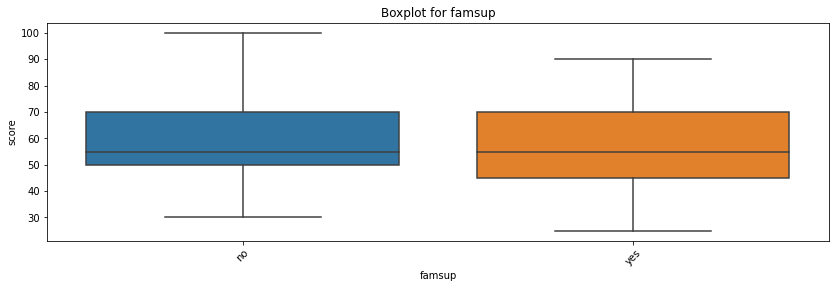

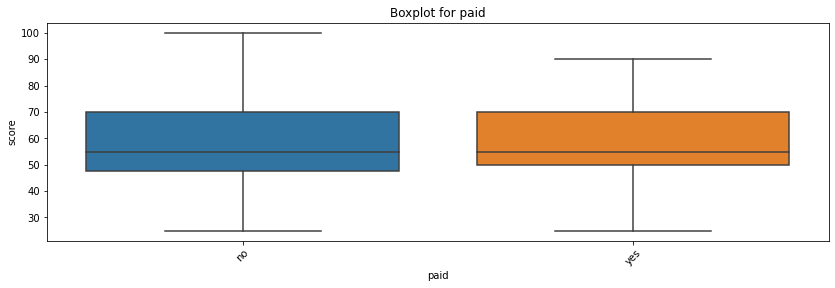

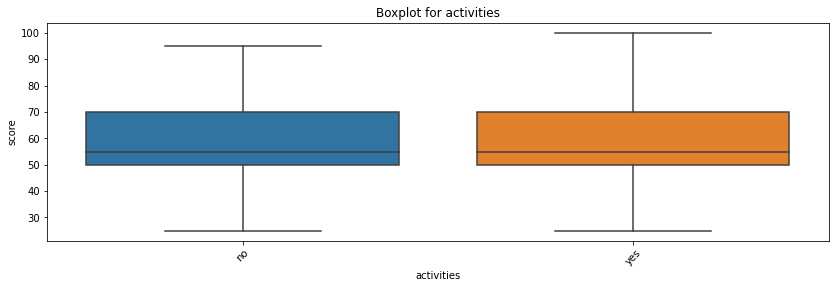

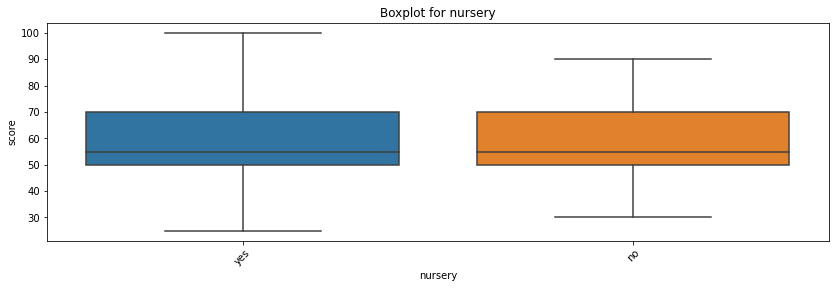

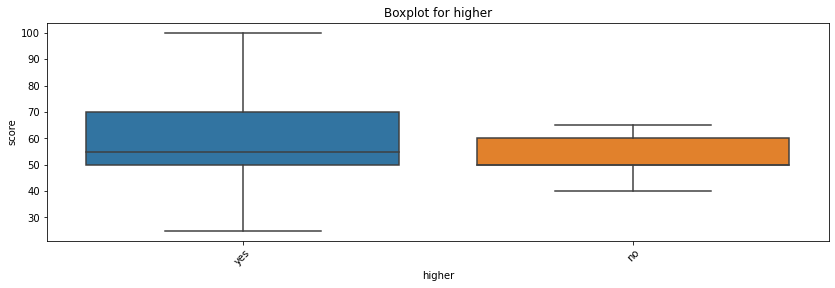

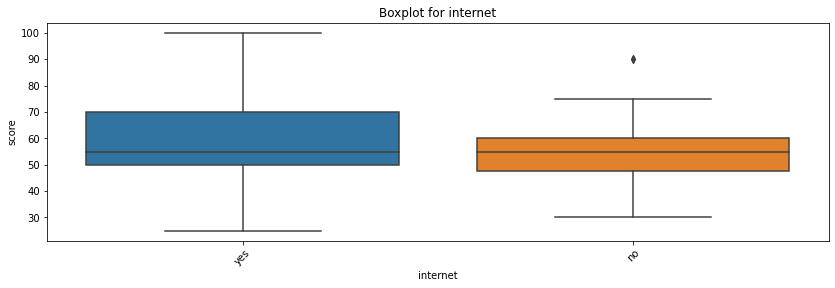

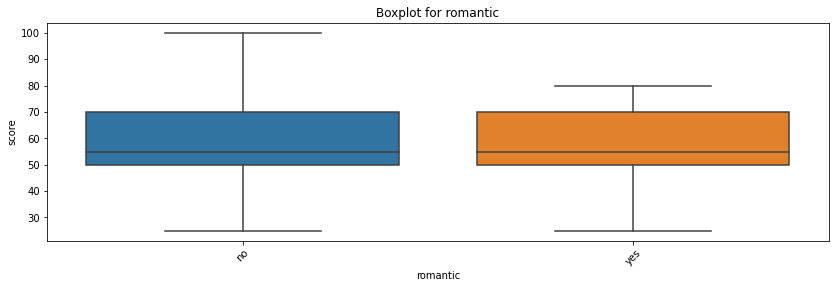

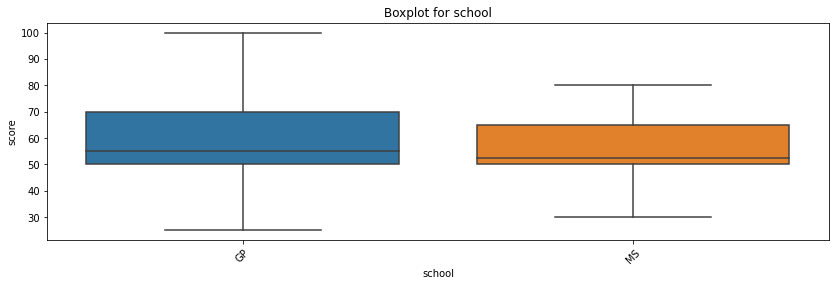

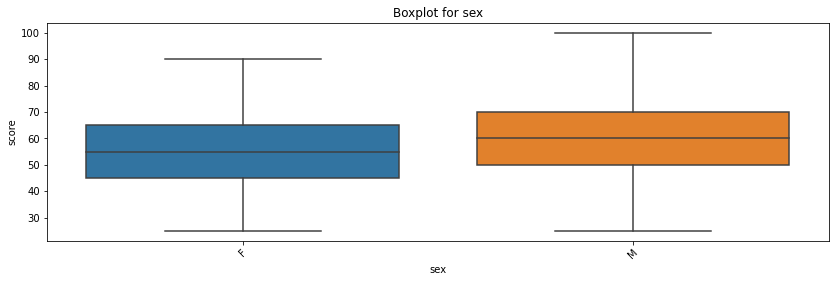

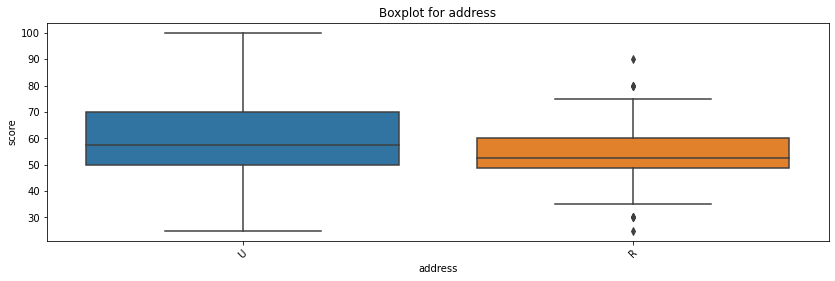

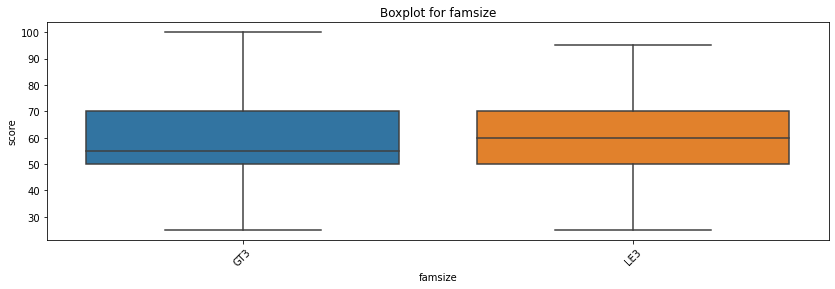

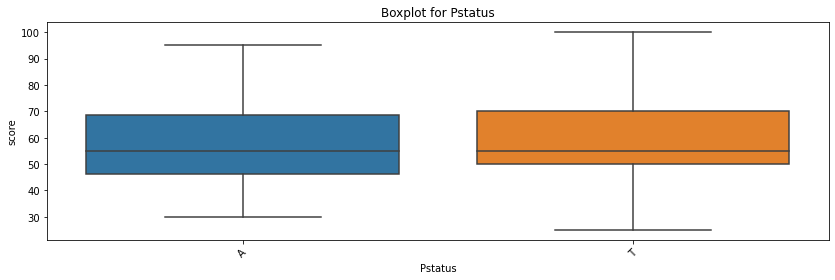

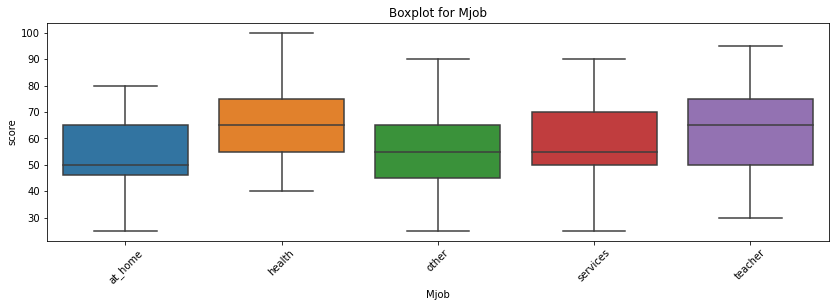

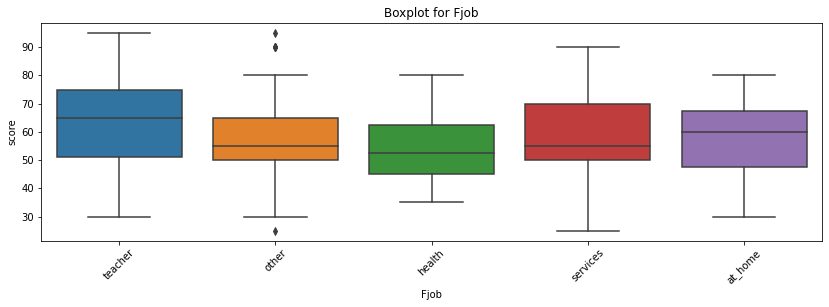

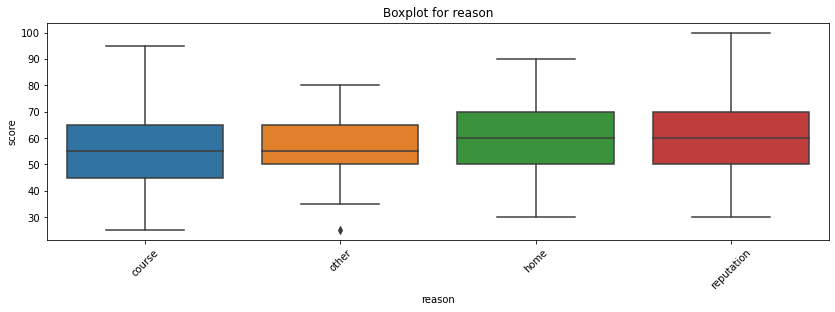

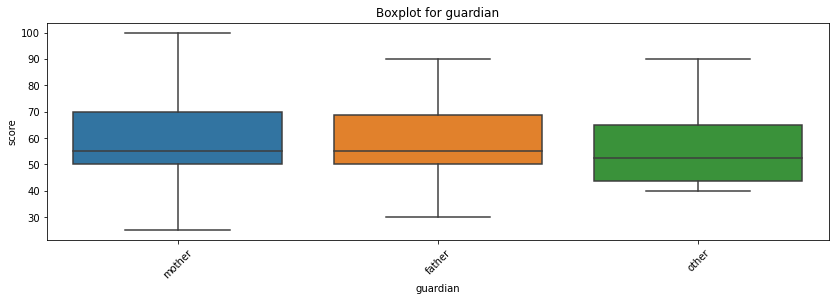

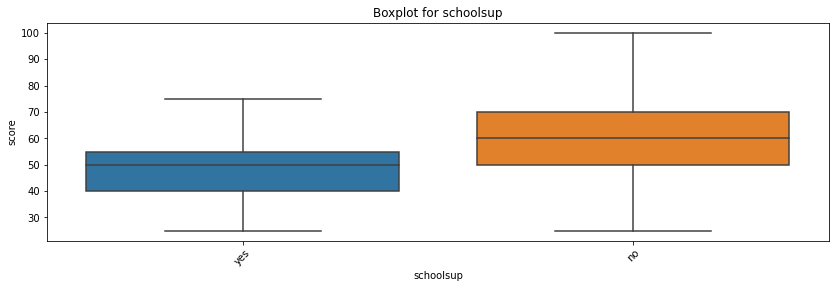

In [116]:
for col in ['famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
           'school', 'sex', 'address', 'famsize', 'Pstatus',
           'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup']:
    get_boxplot(col)

In [119]:
for col in ['famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
           'school', 'sex', 'address', 'famsize', 'Pstatus',
           'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


# Вывод

- В наборе данных имеются пустые значения, но в целом их количество небольшое.

- В некоторых колонках были обнаружены выбросы. Такими колонками являются: Fedu, traveltime, famrel, absences.

- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это failures, sex, address, Mjob, schoolsup.